<div style=" background-color: RGB(153, 54, 80);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Projet 5 - DATA ANALYSE</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec Python</h2>
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">DELCOURT Jade
</h3>
</div>

# 1. Import des librairies et chargement des fichiers 

##### Import de librairies 

    Pandas pour analyser et manipuler les données,
    Numpy pour manipuler des tableaux et des fonctions mathématiques tableaux,
    Matplotlib pour créer des graphiques à partir des données,
    Searborn semblable à une sur couche de Matplotlib qui apport certain designs.
    Warning pour ignorer les avertissements (ne posant aucun problème dans mon code)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore") 

##### Chargement des fichiers Excel

Le chargement des fichiers Excel permets de les stockers dans des dataframes qui vont nous servires de bases de données. 

Les avertissements étaient lors de l'import. Il y avait un souci avec l'extension du fichier, mais cela n'empêchait pas la lecture correcte de ceux-ci.

In [2]:
web = pd.read_excel ("Fichier_web.xlsx")
erp = pd.read_excel ("Fichier_erp.xlsx")
liaisons = pd.read_excel ("fichier_liaison.xlsx")

# 2. Vérification de l'import et nettoyage des fichiers

   ### 1) Fichier web

Vérification que l'import du fichier web c'est bien déroulé.

J'affiche les dimention du dataframe ainsi que les différente information et un aperçu sur celui-ci.

In [3]:
print ("Le dataframe possède", web.shape[1], "colonnes et", web.shape[0], "lignes.")

Le dataframe possède 28 colonnes et 1513 lignes.


In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [5]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Je vérifie que ma colonne Sku, qui est un identifiant et me servira plus tard de clés, ne contient que des valeurs uniques.

In [6]:
if web['sku'].nunique() == len(web['sku']):
    print("Toutes les valeurs de la série sont uniques.")
else:
    print("Il y a des valeurs répétées dans la série.")


Il y a des valeurs répétées dans la série.


Les valeurs ne sont pas unique donc je vais faire une recherche pour savoir quelles sont les valeur en double.

In [7]:
wdup_values = web['sku'][web['sku'].duplicated()]
print("Les valeurs qui ne sont pas uniques dans la série sont :")
print(wdup_values)


Les valeurs qui ne sont pas uniques dans la série sont :
13      16209
17        NaN
53      16274
80      12857
82        NaN
        ...  
1508    12881
1509    15663
1510    15910
1511       38
1512    13599
Name: sku, Length: 798, dtype: object


Je fitre sur les Sku et le nombre de vente vide, avec les NaN, pour avoir que les lignes vides.

Ensuite je suppriment ces lignes vides, par l'index, de mon dataframe.

In [8]:
Lignesup = web.loc[(pd.isna(web["sku"])) & (pd.isna(web["total_sales"]))]
Lignesup.head(83)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
web = web.drop(Lignesup.index)
web.tail()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1512,13599,0,0,0,0.0,1.0,NaN,NaN,2.0,2018-03-01 14:12:39,...,champagne-mailly-grand-cru-blanc-de-pinot-noir,2020-08-26 18:05:02,2020-08-26 16:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Je vérifie de nouveau mes valeurs en double.

Premièrement, je vérifie si j'ai des sku vide encore en double mais avec un nombre de vente différents de zéro.

Pour savoir si j'ai des produits sans identifiants.

In [10]:
Produits_sans_sku = web.loc[(pd.isna(web["sku"])) & (web["total_sales"].notna())]
Produits_sans_sku

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


J'ai donc deux produits sans identifiants. 

Pour m'assurer que ces produits ne sont pas identifiés dans une autre ligne, je fais une recherche par le nom de produit.

In [11]:
print("Il y a", web.loc[web["post_name"] == "pierre-jean-villa-cote-rotie-fongeant-2017"].shape[0], "ligne(s) correspondant au nom de produit donné.")

Il y a 1 ligne(s) correspondant au nom de produit donné.


Je fait une recherche sur mes autre lignes en doublons, avec deux sku de la liste sortie plus haut.

In [12]:
web.loc[web["sku"] == 38]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1123,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


On remarque que sur les deux lignes les différences sont sur les colonnes : tax_status, post_type, post_mime_type et guid. 

L'une des lignes sers à mettre des images sur le site web et l'autre est la vrai ligne de référence produit.

Exemple d'un autre produit avec les colonnes mise en évidence.

In [13]:
web.loc[web["sku"] == 15910 , ["sku", "tax_status", "guid", "post_type", "post_mime_type"] ]

,sku,tax_status,guid,post_type,post_mime_type
681,15910,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1510,15910,taxable,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


Deux choix sont possibles : 

1. La conservation des deux lignes dans un seul fichier(le risque est qu'il y ait des confusions dans le chiffre d'affaires).
2. La création d'un nouveau DataFrame qui ne conserve que les lignes de produits réels où le post_type est "product".

La deuxième option est plus sur pour des analyses.

In [14]:
web_products = web.loc[web["post_type"] == "product"]  
web_products

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1503,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1507,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### 2) Fichier liaisons

Vérification que l'import du fichier liaisons c'est bien déroulé.

J'affiche les dimention du dataframe ainsi que les différente information et un aperçu sur celui-ci.

In [15]:
print ("Le data frmae possède", liaisons.shape[1], "colonnes et", liaisons.shape[0], "lignes.")

Le data frmae possède 2 colonnes et 825 lignes.


In [16]:
liaisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [17]:
liaisons.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Je renomme la colonne Id_web en Sku pour assurer une uniformité de nomenclature dans mes différents fichiers en vue d'une future jointure.

In [18]:
liaisons.rename(columns = {"id_web" : "sku"}, inplace = True)

Je convertis l'identifiant du produit en objet pour éviter toute confusion ou erreur.

In [19]:
liaisons["product_id"] = liaisons["product_id"].astype(str)

Je vérifie que ma colonne product_id, qui est un identifiant et me servira plus tard de clés, ne contient que des valeurs uniques.

In [20]:
if liaisons['product_id'].nunique() == len(liaisons['product_id']):
    print("Toutes les valeurs de la série sont uniques.")
else:
    print("Il y a des valeurs répétées dans la série.")


Toutes les valeurs de la série sont uniques.


Je vérifie que ma colonne sku, qui est un autre identifiant et me servira plus tard de clés, ne contient que des valeurs uniques.

In [21]:
if liaisons['sku'].nunique() == len(liaisons['sku']):
    print("Toutes les valeurs de la série sont uniques.")
else:
    print("Il y a des valeurs répétées dans la série.")


Il y a des valeurs répétées dans la série.


Les valeurs ne sont pas unique donc je vais faire une recherche pour savoir quelles sont les valeur en double.

In [22]:
ldup_values = liaisons['sku'][liaisons['sku'].duplicated()]
print("Les valeurs qui ne sont pas uniques dans la série sont :")
print(ldup_values)


Les valeurs qui ne sont pas uniques dans la série sont :
49     NaN
50     NaN
119    NaN
131    NaN
151    NaN
      ... 
817    NaN
818    NaN
819    NaN
820    NaN
821    NaN
Name: sku, Length: 90, dtype: object


Je fitre sur les Sku vide, avec les NaN, pour avoir que les lignes vides. 

Ensuite je suppriment ces lignes vides, par l'index, de mon dataframe.

In [23]:
Lignlsup = liaisons.loc[pd.isna(liaisons["sku"])]
liaisons = liaisons.drop(Lignlsup.index)
liaisons

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


Enfin, j'ai repéré 3 sku contenant un "-".

In [24]:
liaisons.loc[liaisons["sku"].str.contains("-", na=False)]

,product_id,sku
443,4954,bon-cadeau-25-euros
822,7247,13127-1
823,7329,14680-1


### 3) Fichier erp

Vérification que l'import du fichier erp c'est bien déroulé.

J'affiche les dimention du dataframe ainsi que les différente information et un aperçu sur celui-ci.

In [25]:
print ("Le data frmae possède", erp.shape[1], "colonnes et", erp.shape[0], "lignes.")

Le data frmae possède 5 colonnes et 825 lignes.


In [26]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [27]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


Je convertis l'identifiant du produit en objet pour éviter toute confusion ou erreur.

In [28]:
erp["product_id"] = erp["product_id"].astype(str)

Je vérifie que ma colonne product_id, qui est un identifiant et me servira plus tard de clés, ne contient que des valeurs uniques.

In [29]:
if erp['product_id'].nunique() == len(erp['product_id']):
    print("Toutes les valeurs de la série sont uniques.")
else:
    print("Il y a des valeurs répétées dans la série.")


Toutes les valeurs de la série sont uniques.


Je vérifie les maximun et minimun de prix.

Je sort également les prix négatifs.

In [30]:
print("Le prix max est", erp["price"].max(), ", le prix minimum est", erp["price"].min())
Prix_negatifs = erp.loc[erp['price'] < 0]
Prix_negatifs

Le prix max est 225.0 , le prix minimum est -8.0


,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


# 3. Création d'une table par une jointure entre les dataframes 

Pour rassembler les différentes données en un seul endroit et pouvoir réaliser des analyses dessus, je vais joindre les tables ERP et Web grâce à la table de liaison. 

Je vais réalisé une jointure externe pour récupérer un maximum d'informations, puis procéder aux modifications nécessaires pour nettoyer les données.

In [31]:
data_unifier = pd.merge(erp, liaisons, on = "product_id", how = "outer")
data_unifier = pd.merge(data_unifier, web_products, on = "sku", how = "outer")

J'affiche les dimention du dataframe ainsi que les différente information et un aperçu sur celui-ci.

In [32]:
print ("Le data frmae possède", data_unifier.shape[1], "colonnes et", data_unifier.shape[0], "lignes.")

Le data frmae possède 33 colonnes et 916 lignes.


In [33]:
data_unifier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             916 non-null    object        
 1   onsale_web             916 non-null    int64         
 2   price                  916 non-null    float64       
 3   stock_quantity         916 non-null    int64         
 4   stock_status           916 non-null    object        
 5   sku                    734 non-null    object        
 6   virtual                896 non-null    float64       
 7   downloadable           896 non-null    float64       
 8   rating_count           896 non-null    float64       
 9   average_rating         896 non-null    float64       
 10  total_sales            896 non-null    float64       
 11  tax_status             896 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

In [34]:
data_unifier.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Je filtre sur les sku vides, représentés par les NaN, car les deux lignes sans sku se dupliquent pour se lier avec les ID produit sans correspondance de la table de liaisons.

Ensuite je suppriment ces lignes, par l'index, de mon dataframe.

In [35]:
sku_vide = data_unifier.loc[pd.isna(data_unifier["sku"])]

In [36]:
data_unifier = data_unifier.drop(sku_vide.index)
data_unifier

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
912,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
913,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
914,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
print("Le prix max est", data_unifier["price"].max(), ", le prix minimum est", data_unifier["price"].min())
print("Il y a", data_unifier.loc[data_unifier['price'] < 0].shape[0], "ligne(s) avec un prix négatif")

Le prix max est 225.0 , le prix minimum est 5.2
Il y a 0 ligne(s) avec un prix négatif


J'ajoute une colonne CA pour le chiffre d'affaire réalisé pour chaque produit.

In [38]:
data_unifier["CA"] = data_unifier["price"] * data_unifier["total_sales"]
data_unifier.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


# 4. Les analyses 

##### Chiffre d'affaire globale 

Je calcule le chiffre d'affaire de l'entreprise.

In [39]:
print ("Le chiffre d'affaire globle est de", np.sum(data_unifier["price"]*data_unifier["total_sales"]), "euros.")

Le chiffre d'affaire globle est de 70568.6 euros.


##### Etudes des ventes 

Je vais sortir la liste des 5 produits les plus vendus.

In [40]:
data_unifier.sort_values(by = "total_sales", ascending = False).head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
377,4334,1,49.0,0,outofstock,7818,0.0,0.0,0.0,0.0,...,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4704.0
253,4144,1,49.0,11,instock,1662,0.0,0.0,0.0,0.0,...,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4263.0
212,4068,1,16.6,157,instock,16416,0.0,0.0,0.0,0.0,...,2020-08-27 16:05:04,2020-08-27 14:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1029.2
301,4200,1,5.8,190,instock,16295,0.0,0.0,0.0,0.0,...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,266.8
279,4172,1,5.7,167,instock,16210,0.0,0.0,0.0,0.0,...,2020-08-27 15:35:02,2020-08-27 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,245.1


Je vais sortir la liste des 5 produits avec les chiffres d'affaires les plus gros.

In [41]:
data_unifier.sort_values(by = "CA", ascending = False).head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
377,4334,1,49.0,0,outofstock,7818,0.0,0.0,0.0,0.0,...,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4704.0
253,4144,1,49.0,11,instock,1662,0.0,0.0,0.0,0.0,...,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4263.0
401,4402,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
252,4142,1,53.0,8,instock,11641,0.0,0.0,0.0,0.0,...,2020-08-20 09:30:03,2020-08-20 07:30:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1590.0
251,4141,1,39.0,1,instock,304,0.0,0.0,0.0,0.0,...,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1560.0


##### Représentation statistiques de mes valeurs

Dans un premier temps je calcule mes mesures centrale :

- La moyenne : la valeur obtenue en additionnant toutes les valeurs et en divisant le total par le nombre de valeurs.
- La médiane : la valeur pour laquelle 50 % des valeurs lui sont supérieures et 50 % lui sont inférieures.
- Le mode : la valeur la plus fréquente.

In [42]:
print("La moyenne est", data_unifier["price"].mean())
print("La médianne est", data_unifier["price"].median())
print("Le mode est", data_unifier["price"].mode()[0])

La moyenne est 32.21689373297002
La médianne est 23.4
Le mode est 19.0


Ensuite je calcule mes mesures de formes:

- Le skewness : mesure l'asymétrie de la distribution des valeurs par rapport à la valeur centrale. Si > 0, cela indique que les valeurs s'étendent davantage vers la gauche.
- Le kurtosis : mesure l'aplatissement par rapport à la courbe de Gauss, qui est symétrique. Si > 0, cela indique une distribution moins aplatie que la distribution normale et que les valeurs sont plus concentrées.

In [43]:
print("Le skewness est", data_unifier["price"].skew())
print("Le kurtosis est", data_unifier["price"].kurtosis())

Le skewness est 2.615107804562458
Le kurtosis est 10.372623813898564


Mes valeurs sont concentrées, avec certaines d'entre elles s'étendant vers la gauche.

Voici une représentation graphique du kurtosis pour une meilleure visualisation :

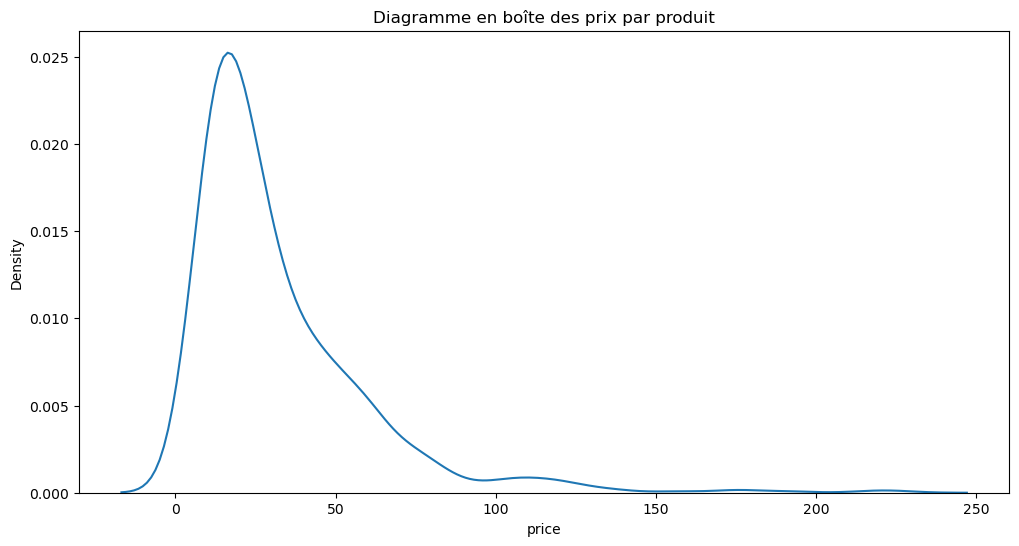

In [44]:
price = data_unifier["price"]

plt.figure(figsize=(12, 6))
sns.kdeplot(price)

plt.title('Diagramme en boîte des prix par produit')
plt.show()

##### Mes méthodes de détection des Outlieurs

_La méthode des Z - scores_

Cette méthode permets de détecter les valeurs les plus éloigner de la moyenne avec l'écart type. Pour considérer une valeur comme outlieurs le Z - score doit être supérieur à 3.

In [45]:
Moyenne = data_unifier["price"].mean()
Ecart = data_unifier["price"].std() 
Zscore = (data_unifier["price"] - Moyenne) / Ecart 
out = Zscore > 3
outlieurs = Zscore[out].sort_values(ascending = False)
outlieurs

382    7.003814
616    6.731338
783    5.779492
401    5.223643
748    5.187313
404    4.533372
569    3.806772
843    3.734112
384    3.425307
706    3.363546
799    3.261822
855    3.225492
858    3.225492
849    3.058374
854    3.007512
857    3.007512
Name: price, dtype: float64

In [46]:
List_outieurs = data_unifier.loc[outlieurs.index]
List_outieurs

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
382,4352,1,225.0,0,outofstock,15940,0.0,0.0,0.0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
616,5001,1,217.5,20,instock,14581,0.0,0.0,0.0,0.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
783,5892,1,191.3,10,instock,14983,0.0,0.0,0.0,0.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9
401,4402,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
748,5767,1,175.0,12,instock,15185,0.0,0.0,0.0,0.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
404,4406,1,157.0,3,instock,7819,0.0,0.0,0.0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
569,4904,1,137.0,13,instock,14220,0.0,0.0,0.0,0.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,685.0
843,6126,1,135.0,10,instock,14923,0.0,0.0,0.0,0.0,...,2020-08-27 11:45:02,2020-08-27 09:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,270.0
384,4355,1,126.5,2,instock,12589,0.0,0.0,0.0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
706,5612,1,124.8,12,instock,14915,0.0,0.0,0.0,0.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [47]:
print("Avec cette méthode je trouve", outlieurs.count(), "outliers.")

Avec cette méthode je trouve 16 outliers.


Je vais représenter graphiquement mes 16 outliers par rapport au reste de mes données en fonction des Z-scores et de leur seuil de 3.

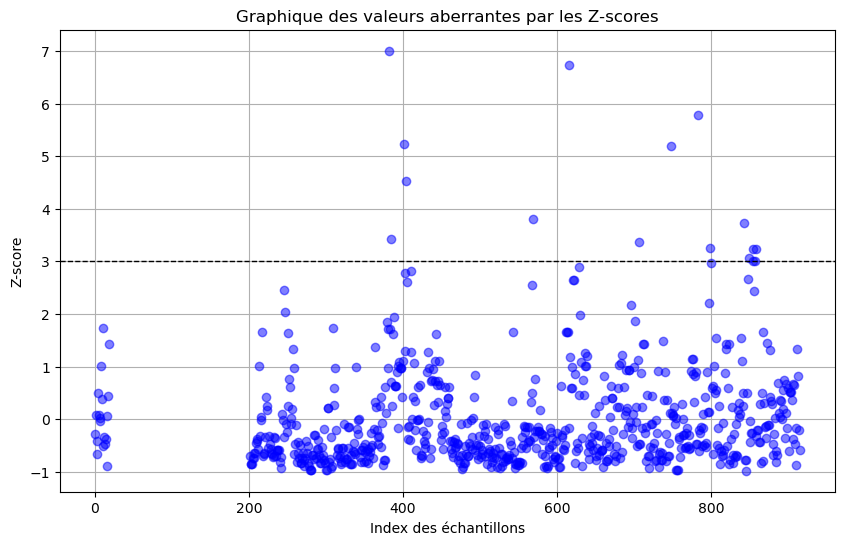

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(Zscore, marker='o', linestyle='None', color='blue', alpha=0.5)
plt.axhline(y=3, color='black', linestyle='--', linewidth=1)
plt.xlabel('Index des échantillons')
plt.ylabel('Z-score')
plt.title('Graphique des valeurs aberrantes par les Z-scores')
plt.grid(True)
plt.show()

_La méthode des Boîtes à moustaches_

Cette méthode permets de détecter les valeurs aberrantes en se bassant sur cinq statistiques : la médiane, les quartiles Q1 et Q3, et les valeurs minimum et maximum non considérées comme outliers.

Pour considérer une valeur comme outlieurs elle doit être à plus de 1,5 fois l'écart interquartile.

Voici la représentation graphique de la boîte à moustache avec les valeurs aberrantes réprésentés par des cerlces.

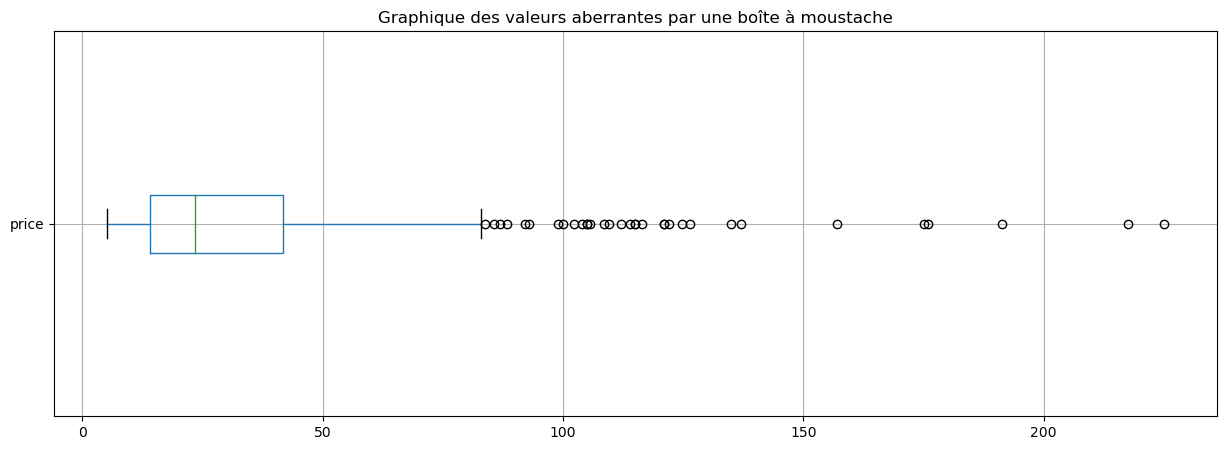

In [49]:
plt.figure(figsize = (15,5))
data_unifier.boxplot(column = "price", vert=False)
plt.title("Graphique des valeurs aberrantes par une boîte à moustache")
plt.show()

Ensuite je vais réaliser les calcules par moi même pour sortir la liste des valeurs aberrantes que l'on vois sur le graphique.

In [50]:
medine = data_unifier["price"].median()
Q1 = data_unifier.loc[data_unifier["price"] < medine, "price"].median()
Q3 = data_unifier.loc[data_unifier["price"] > medine, "price"].median()
Ecart_interquartile = Q3 - Q1
Outliers = Q3 + (1.5 * Ecart_interquartile)
Outliers = data_unifier.loc[data_unifier["price"]  >  Outliers]
Outliers.sort_values(by = "price", ascending = False)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
382,4352,1,225.0,0,outofstock,15940,0.0,0.0,0.0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
616,5001,1,217.5,20,instock,14581,0.0,0.0,0.0,0.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
783,5892,1,191.3,10,instock,14983,0.0,0.0,0.0,0.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9
401,4402,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
748,5767,1,175.0,12,instock,15185,0.0,0.0,0.0,0.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
404,4406,1,157.0,3,instock,7819,0.0,0.0,0.0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
569,4904,1,137.0,13,instock,14220,0.0,0.0,0.0,0.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,685.0
843,6126,1,135.0,10,instock,14923,0.0,0.0,0.0,0.0,...,2020-08-27 11:45:02,2020-08-27 09:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,270.0
384,4355,1,126.5,2,instock,12589,0.0,0.0,0.0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
706,5612,1,124.8,12,instock,14915,0.0,0.0,0.0,0.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [51]:
print("Avec cette méthode je trouve", len(Outliers), "outliers.")

Avec cette méthode je trouve 32 outliers.


Ma liste d'outliers est plus complète avec cette méthode, cependant, on retrouve toujours les mêmes 16 premières valeurs aberrantes.

# 5. Conclusion

Pour conclure, sur les valeurs aberrantes que j'ai trouvées grâce aux méthodes statistiques, j'ai effectué des recherches sur les prix des bouteilles dont les prix sont ressortis, et ils correspondent aux prix du marché.

Ces valeurs ne nécessitent pas d'être exclues car il ne semble pas y avoir d'erreur dans la saisie de leurs prix.